In [1]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [9]:
# # Load publicly available data from Mark Churchland's group
# path = "exampleData.mat"
# datas, times = load_churchland_data(path)

# print(len(times))
# print(datas[0].shape)

# # Create a jPCA object
# jpca = jPCA.JPCA(num_jpcs=6)

n = 1000
t = np.linspace(0, 10, n)

datas = []

x = np.sin(t) + np.random.normal(0.1, 0.01, n)
y = np.cos(t) + np.random.normal(0.1, 0.01, n)
z = t + np.random.normal(0.1, 0.01, n)
tmp = [
    np.hstack(
        (np.array([x, y, z]).T, 
        np.random.multivariate_normal(
            np.zeros(20),np.eye(20),t.shape[0]
        ))
)]
# tmp = tmp + [np.zeros_like(tmp[0])] 
# tmp_0 = np.zeros_like(tmp)
    
print(len(tmp))
print(tmp[0].shape)


1
(1000, 23)


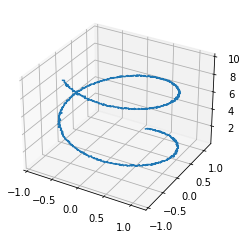

In [10]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x, y, z)

In [34]:
n = 1000
t = np.linspace(0, 10, n)
times = list(t)
extra_dims = 20
cycle = t / (1 * np.pi)
datas = []

for _ in range(108):
    x = np.sin(t) #+ np.random.normal(0, 0.1, n)
    y = np.cos(t) #+ np.random.normal(0, 0.1, n)
    z = t #+ np.random.normal(0.1, 0.01, n)
    # tmp = np.hstack(
    #     (np.array([x, y, z]).T, 
    #     np.random.multivariate_normal(
    #         np.zeros(extra_dims)*0.01,np.eye(extra_dims),t.shape[0]
    #     ))
    # )
    tmp = np.array([x, y, z]).T
    # tmp = np.hstack((
    #     np.array([x, y, z]).T, 
    #     np.zeros((t.shape[0],extra_dims))  
    # ))
    # tmp = np.repeat(np.array([x, y]).T,109,axis=-1)
    
    datas.append(tmp)

print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

len(datas) = 108
datas[0].shape = (1000, 3)


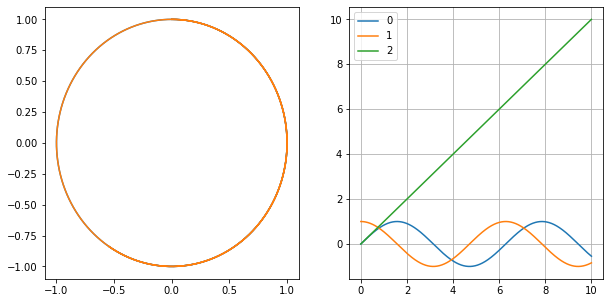

In [35]:
fig, axes = plt.subplots(1,2 , figsize=(10, 5))
axes[0].plot(datas[0][:, 0], datas[0][:, 1])
axes[0].plot(x, y)
for i in range(3):
    axes[1].plot(t, datas[0][:, i], label=f'{i}')
axes[1].grid()
axes[1].legend()
plt.show()


In [36]:
d = [a.T for a in datas]
jpca = jPCA.JPCA(num_jpcs=2)
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(
    d, times=times, tstart=t[0], tend=t[-1], pca=False
)

In [38]:
print(f'jpca_var_capt = {jpca_var_capt}')
print(f'pca_var_capt = {pca_var_capt}')


print("\nOutput:")
# print(np.array_equal(projected[0], np.zeros_like(projected[0])))
print(f'len(projected) = {len(projected)}')
print(f'projected[0].shape = {projected[0].shape}')


jpca_var_capt = [1.71101024e-33 4.79524862e-35]
pca_var_capt = None

Output:
len(projected) = 108
projected[0].shape = (2, 2)


ValueError: x and y must have same first dimension, but have shapes (998,) and (2,)

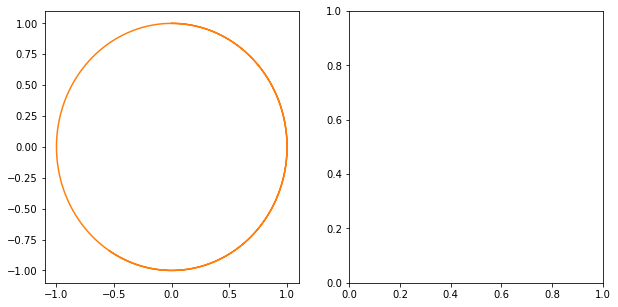

In [41]:
fig, axes = plt.subplots(1,2 , figsize=(10, 5))
axes[0].plot(projected[0][:, 0], projected[0][:, 1])
axes[0].plot(x, y)
for i in range(2):
    axes[1].plot(t[:-2], projected[0][:, i], label=f'{i}')
axes[1].grid()
axes[1].legend()
plt.show()


len(times) = 61
len(datas) = 108
datas[0].shape = (61, 218)
2
(21, 4)


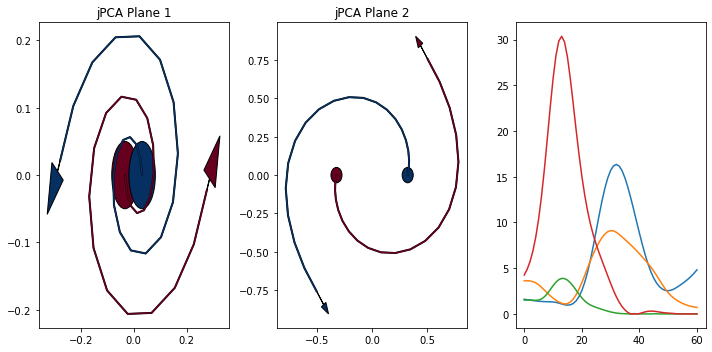

In [5]:
# Load publicly available data from Mark Churchland's group
path = "exampleData.mat"
datas, times = load_churchland_data(path)

print(f'len(times) = {len(times)}')
print(f'len(datas) = {len(datas)}')
print(f'datas[0].shape = {datas[0].shape}')

# Create a jPCA object
jpca = jPCA.JPCA(num_jpcs=4)

# Fit the jPCA object to data
(projected, 
 full_data_var,
 pca_var_capt,
 jpca_var_capt) = jpca.fit(datas[:2], times=times, tstart=-50, tend=150)

print(len(projected))
print(projected[0].shape)
# Plot the projected data
# x_idx and y_idx control which columns of the data are shown.
# For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)

axes[0].set_title("jPCA Plane 1")
axes[1].set_title("jPCA Plane 2")
for i in range(4):
    axes[2].plot(datas[0][:,i])
plt.tight_layout()
plt.show()

In [3]:
# Here's how we would get the variance of first plane:
print("Variance captured by each jPC:")
jpca_var_capt / full_data_var

Variance captured by each jPC:


array([0.14174162, 0.14708453, 0.08170893, 0.07743372, 0.0919853 ,
       0.07063135])

In [4]:
# Example of getting the eigenvalues of M_skew
print("Eigenvalues of M_skew:")
np.round(np.linalg.eigvals(jpca.M_skew), 3)

Eigenvalues of M_skew:


array([ 0.+0.08j ,  0.-0.08j , -0.+0.048j, -0.-0.048j,  0.+0.008j,
        0.-0.008j])